In [1]:
os.chdir('../../')
from Classes.Model_Setup.Conversion import *
from Classes.Model_Setup.Model import *
from Classes.Model_Setup.Plot import *
from Classes.Model_Setup.TrainTestSplit import *
from Classes.Data_Manipulation.Splitting_Data import *

from tensorflow import keras

In [2]:
num_classes = 5   #340 max 
ims_per_class = 20000  #max?

split(num_classes)

path = 'Data/'+str(num_classes)+'_Categories/*.csv'

Array = trainArray(path, num_classes, ims_per_class)

y_train, X_train, y_val, X_val, y_test, X_test = SplitData(Array, num_classes)

model = model(num_classes)

100%|██████████| 5/5 [00:45<00:00,  9.07s/it]


In [3]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="models/"+str(num_classes)+"_Categories_Model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor='loss', patience=10)]

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train,
          batch_size = 256,
          epochs = 250,
          validation_data = (X_val, y_val),
          callbacks = callbacks)

Epoch 1/250
274/274 [==============================] - 10s 19ms/step - loss: 1.4005 - accuracy: 0.4018 - val_loss: 1.7193 - val_accuracy: 0.3142
Epoch 2/250
274/274 [==============================] - 5s 17ms/step - loss: 1.1353 - accuracy: 0.5465 - val_loss: 1.4687 - val_accuracy: 0.4871
Epoch 3/250
274/274 [==============================] - 5s 17ms/step - loss: 1.0035 - accuracy: 0.6098 - val_loss: 1.5789 - val_accuracy: 0.4765
Epoch 4/250
274/274 [==============================] - 5s 17ms/step - loss: 0.9214 - accuracy: 0.6442 - val_loss: 1.5323 - val_accuracy: 0.4965
Epoch 5/250
274/274 [==============================] - 5s 17ms/step - loss: 0.8625 - accuracy: 0.6720 - val_loss: 2.0122 - val_accuracy: 0.4324
Epoch 6/250
274/274 [==============================] - 5s 17ms/step - loss: 0.8020 - accuracy: 0.6987 - val_loss: 1.2729 - val_accuracy: 0.5863
Epoch 7/250
274/274 [==============================] - 5s 17ms/step - loss: 0.7558 - accuracy: 0.7171 - val_loss: 0.8486 - val_accuracy

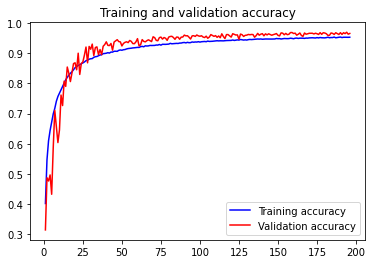

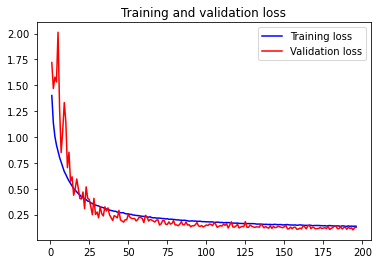

In [5]:
plot_function(history)

In [6]:
test_model = keras.models.load_model("models/"+str(num_classes)+"_Categories_Model.h5")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

469/469 [==============================] - 3s 5ms/step - loss: 0.1085 - accuracy: 0.9684
Test accuracy: 0.968


In [8]:
os.getcwd()


'c:\\Users\\Brune\\Documents\\GitHub\\Stage\\QuickDraw-Project'

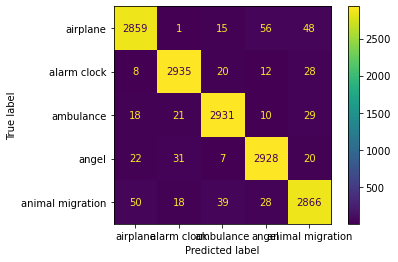

In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
l=os.listdir('Data/'+str(num_classes)+'_Categories/')
li=[x.split('.')[0] for x in l]

predictions = test_model.predict(X_test) 
y_pred = (predictions >= 0.5)
rounded_labels=np.argmax(y_test, axis=1)

matrix = metrics.confusion_matrix(rounded_labels, y_pred.argmax(axis=1))
matrix.diagonal()/matrix.sum(axis=1)
cmd = ConfusionMatrixDisplay(matrix, display_labels=li)
cmd.plot()